In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file=pd.read_csv('economic_index.csv')
file

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [7]:
file.drop(columns=['Unnamed: 0','year','month'],inplace=True,axis=1)
file

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [8]:
file.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

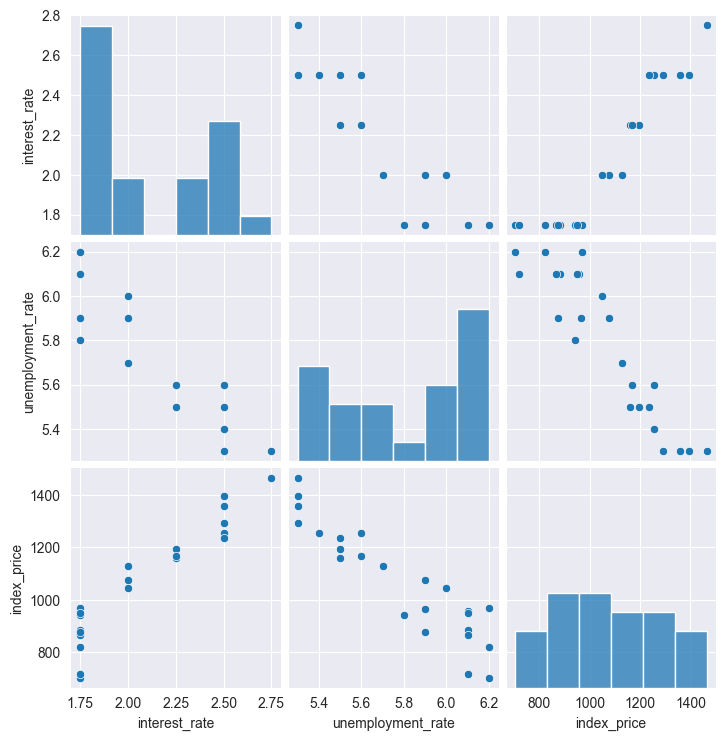

In [9]:
import seaborn as sns
sns.pairplot(file)

In [10]:
file.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

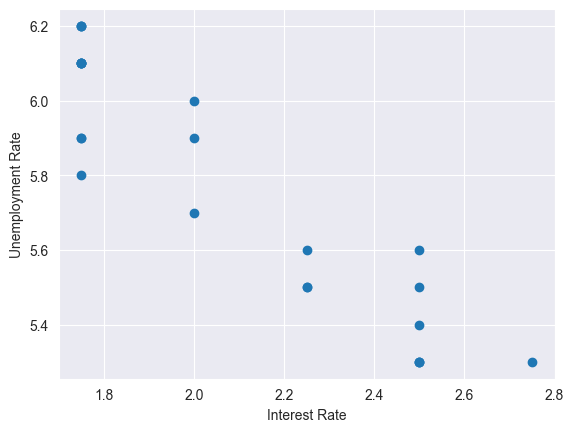

In [11]:
plt.scatter(file['interest_rate'],file['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [12]:
x=file.iloc[:,:-1] # all rows of every column except the last one in independent features
y=file.iloc[:,-1]

In [13]:
x

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [14]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#Best Fit line

using regplot we can get the best fit line (for reference purposes)

the blue shaded shows the line can be moved in that region

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

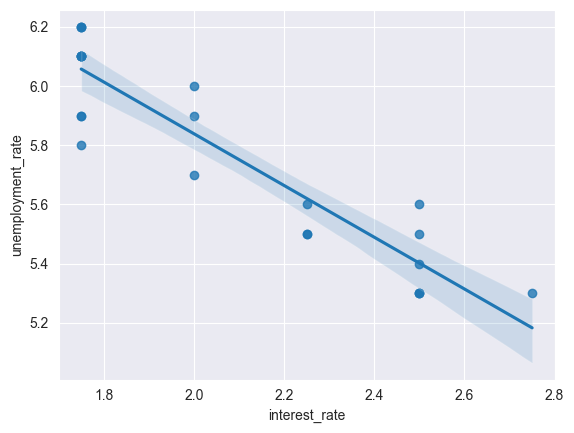

In [16]:
sns.regplot(x=file['interest_rate'], y=file['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

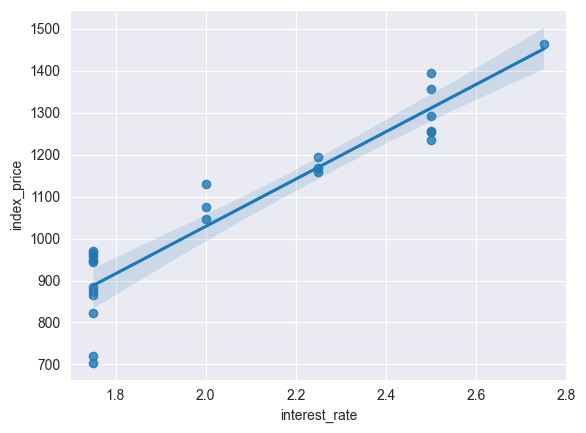

In [17]:
sns.regplot(x=file['interest_rate'], y=file['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

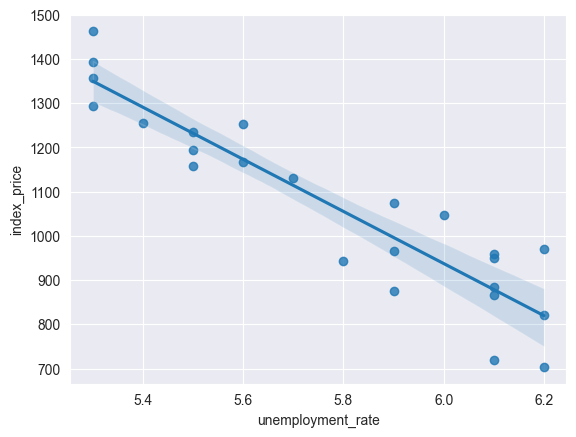

In [18]:
sns.regplot(x=file['unemployment_rate'],y=file['index_price'])

Here We can use fit_transform for x_test also instead of transform only

In [19]:
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [20]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [22]:
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
regression.coef_

array([  88.27275507, -116.25716066])

# Cross Validation

earlier we use to directly make the regression model by creating training and test data but we can also do one step more

here we create validation data (subset of training data)

for ex if intial data rows=1000  training =900 and test =100

then after using cross_validation score if cv=5 then 900/5=180

so every cv=1....5 it will create unique 180 data rows from 900 training data and get mse for every cv after that we can take avg of all those 5 mse

In [24]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,cv=3,scoring='neg_mean_squared_error')
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [25]:
np.mean(validation_score)

np.float64(-5914.828180162388)

In [26]:
y_pred=regression.predict(x_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [27]:
#Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

73.80444932337097
8108.567426306604
90.04758423359621


In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7591371539010257

In [29]:
#adjusted R square
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.5985619231683761


ASSUMPTIONS

we will check the accuracy of our model

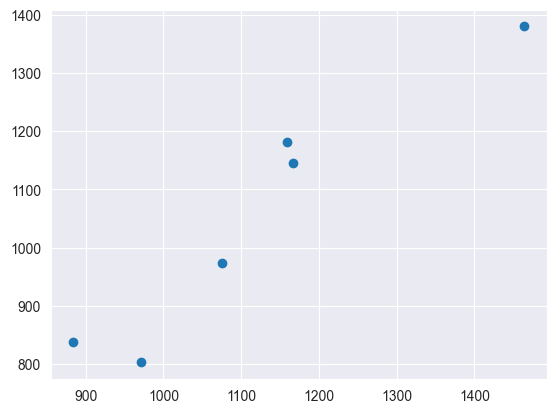

In [30]:
plt.scatter(y_test,y_pred)
#here linear relationships denotes that our model is working well

In [31]:
residuals=y_test-y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

Here the bell like curve denotes that model is correct and accurate

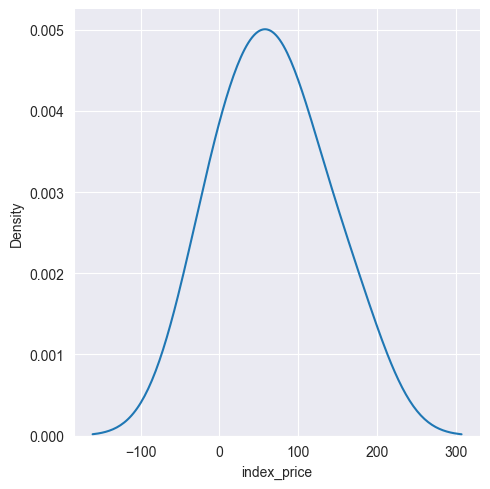

In [32]:
sns.displot(residuals,kind='kde')

Here we got no pattern and it's  uniform which also shows there is no error in the model

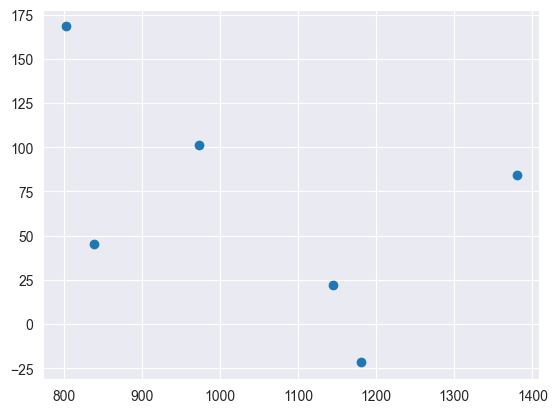

In [33]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [34]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 23 Aug 2025   Prob (F-statistic):                       0.754
Time:                        21:30:54   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""